<a href="https://colab.research.google.com/github/kkmcgg/tide/blob/main/kkmc_constituents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
!git clone https://github.com/kkmcgg/tide.git

Cloning into 'tide'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 47 (delta 4), reused 26 (delta 0), pack-reused 0
Receiving objects: 100% (47/47), 3.01 MiB | 18.70 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [43]:
%cd /content/tide/constituents/WebTide/nwatl
!ls

/content/tide/constituents/WebTide/nwatl
constituents.txt   M2.barotropic.s2c  nwatl.ele		 O1.barotropic.v2c  timesteps.txt
contour.legend	   M2.barotropic.v2c  nwatl_ll.nod	 S2.barotropic.s2c  WebSalinity_depths.txt
IOS_tidetbl	   N2.barotropic.s2c  nwatl.properties	 S2.barotropic.v2c  WebTide_depths.txt
K1.barotropic.s2c  N2.barotropic.v2c  nwatl.xmgr	 tide
K1.barotropic.v2c  nwatl.bat	      O1.barotropic.s2c  tidecor.cfg


['M2', 'K1', 'N2', 'S2', 'O1', 'NONE']
[[ 1.00000e+00 -5.81342e+01  6.69247e+01]
 [ 2.00000e+00 -5.83643e+01  6.69087e+01]
 [ 3.00000e+00 -5.81122e+01  6.68173e+01]
 ...
 [ 1.70530e+04 -6.36764e+01  4.53588e+01]
 [ 1.70540e+04 -6.36440e+01  4.53801e+01]
 [ 1.70550e+04 -6.36398e+01  4.53471e+01]]


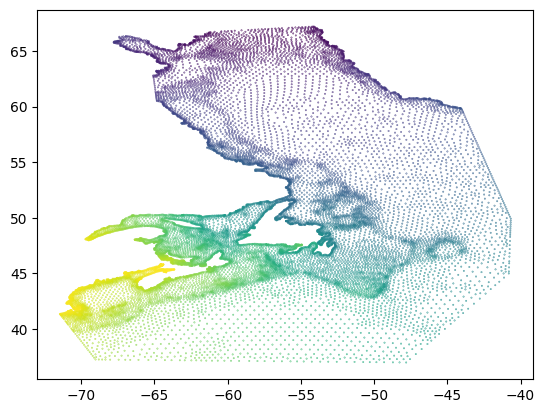

In [44]:
import numpy as np
with open('constituents.txt', 'r') as file:
    consts = [line.strip() for line in file.readlines()]

print(consts)

# with open('nwatl_ll.nod', 'r') as file:
    # grid = [line.strip() for line in file.readlines()]

grid = np.genfromtxt('nwatl_ll.nod')
print(grid)

import matplotlib.pyplot as plt

plt.scatter(grid[:,1], grid[:,2], c = grid[:,0], s=.1)


[[1.00000e+00 7.21800e+02]
 [2.00000e+00 7.21800e+02]
 [3.00000e+00 7.21800e+02]
 ...
 [1.70530e+04 1.14899e+01]
 [1.70540e+04 1.14613e+01]
 [1.70550e+04 1.15604e+01]]


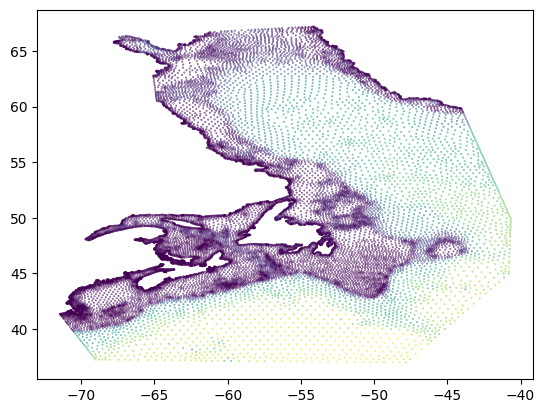

In [45]:
z = np.genfromtxt('nwatl.bat')
print(z)

plt.scatter(grid[:,1], grid[:,2], c = z[:,1], s=.1)

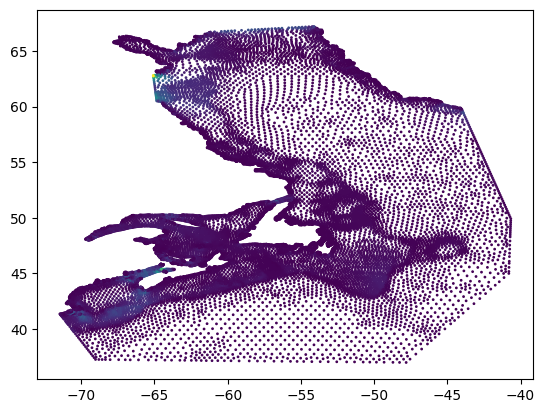

In [60]:
m2v2c = np.genfromtxt('M2.barotropic.v2c',skip_header=3)
# print(m2v2c)

plt.scatter(grid[:,1], grid[:,2], c = m2v2c[:,1], s=1)

In [52]:
import os
file_list = os.listdir()

for file_name in file_list:
  # print(file_name)
  try:
    # check = np.genfromtxt(file_name)
    check = np.genfromtxt(file_name, skip_header=3)
    print(file_name)
    print(check.shape)
  except:
    pass


nwatl_ll.nod
(17052, 3)
timesteps.txt
(2,)
constituents.txt
(3,)
O1.barotropic.v2c
(17055, 5)
WebSalinity_depths.txt
(0,)


<ipython-input-52-e9c500969efa>:8: UserWarning: genfromtxt: Empty input file: "WebSalinity_depths.txt"
  check = np.genfromtxt(file_name, skip_header=3)


M2.barotropic.s2c
(17055, 3)
nwatl.ele
(30836, 4)
K1.barotropic.v2c
(17055, 5)
S2.barotropic.v2c
(17055, 5)
M2.barotropic.v2c
(17055, 5)
contour.legend
(3, 4)
N2.barotropic.v2c
(17055, 5)
tidecor.cfg
(0,)
O1.barotropic.s2c
(17055, 3)
S2.barotropic.s2c
(17055, 3)


<ipython-input-52-e9c500969efa>:8: UserWarning: genfromtxt: Empty input file: "tidecor.cfg"
  check = np.genfromtxt(file_name, skip_header=3)


N2.barotropic.s2c
(17055, 3)
nwatl.bat
(17052, 2)
WebTide_depths.txt
(0,)
K1.barotropic.s2c
(17055, 3)


<ipython-input-52-e9c500969efa>:8: UserWarning: genfromtxt: Empty input file: "WebTide_depths.txt"
  check = np.genfromtxt(file_name, skip_header=3)


Lets get some val data

https://tides.gc.ca/tides/en/web-services-offered-canadian-hydrographic-service

station list:

https://api-iwls.dfo-mpo.gc.ca/api/v1/stations

id":"5cebf1e23d0f4a073c4bbfac","code":"00491","officialName":"Bedford Institute","operating":true,"latitude":44.682262,"longitude":-63.613239,"type":"PERMANENT"

api call example:

https://api-iwls.dfo-mpo.gc.ca/api/v1/stations/5cebf1e23d0f4a073c4bbfac/data?time-series-code=wlo&from=2020-10-01T00:00:00Z&to=2020-10-01T00:30:00Z

In [75]:
import requests
import numpy as np

# API endpoint
url = "https://api-iwls.dfo-mpo.gc.ca/api/v1/stations/5cebf1e23d0f4a073c4bbfac/data?time-series-code=wlp&from=2020-10-01T00:00:00Z&to=2020-10-03T00:30:00Z"

# Make the GET request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON data
    data = response.json()

    print(data)

    # Extract times and values
    times = [item['eventDate'] for item in data]
    values = [item['value'] for item in data]

    # Convert to NumPy arrays
    times_array = np.array(times)
    values_array = np.array(values)

    # times_array, values_array

    print(times_array)
    print(values_array)

else:
    print("Failed to retrieve data. Status code:", response.status_code)

[{'eventDate': '2020-10-01T00:00:00Z', 'qcFlagCode': '2', 'value': 1.782, 'timeSeriesId': '5cebf1e23d0f4a073c4bbfa8'}, {'eventDate': '2020-10-01T00:15:00Z', 'qcFlagCode': '2', 'value': 1.749, 'timeSeriesId': '5cebf1e23d0f4a073c4bbfa8'}, {'eventDate': '2020-10-01T00:30:00Z', 'qcFlagCode': '2', 'value': 1.704, 'timeSeriesId': '5cebf1e23d0f4a073c4bbfa8'}, {'eventDate': '2020-10-01T00:45:00Z', 'qcFlagCode': '2', 'value': 1.649, 'timeSeriesId': '5cebf1e23d0f4a073c4bbfa8'}, {'eventDate': '2020-10-01T01:00:00Z', 'qcFlagCode': '2', 'value': 1.585, 'timeSeriesId': '5cebf1e23d0f4a073c4bbfa8'}, {'eventDate': '2020-10-01T01:15:00Z', 'qcFlagCode': '2', 'value': 1.513, 'timeSeriesId': '5cebf1e23d0f4a073c4bbfa8'}, {'eventDate': '2020-10-01T01:30:00Z', 'qcFlagCode': '2', 'value': 1.435, 'timeSeriesId': '5cebf1e23d0f4a073c4bbfa8'}, {'eventDate': '2020-10-01T01:45:00Z', 'qcFlagCode': '2', 'value': 1.352, 'timeSeriesId': '5cebf1e23d0f4a073c4bbfa8'}, {'eventDate': '2020-10-01T02:00:00Z', 'qcFlagCode': '2'

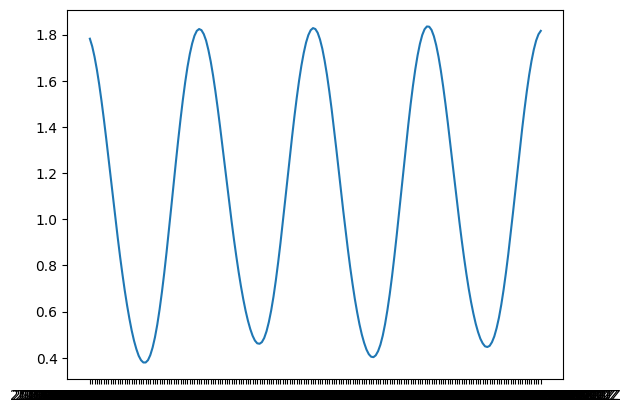

In [76]:
plt.plot(times_array, values_array)

NOW... lets predict the tide for

"latitude":44.682262,"longitude":-63.613239
from=2020-10-01T00:00:00Z&to=2020-10-03T00:30:00Z"

with the constituients!

In [ ]:
## stay tuned...